<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/13-cfg-to-pda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 13: CFGs to PDAs

In [ ]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2023 /content/theory
%cd -q /content/theory/notes

In this notebook, we'll show that context-free grammars and pushdown automata are equivalent. First, we will show how to convert a context-free grammar to a pushdown automaton, which is important because it is the basis for a lot of *parsing* algorithms (algorithms that take a string as input, decide whether it belongs to the language, and if so, generates a tree as output).

## CFGs to PDAs

<div class="alert alert-info"><p><b>Read</b> Section 2.2, Lemma 2.21.</p>
</div>

The construction used in the proof of Lemma 2.21 is known as *top-down* or sometimes "nondeterministic LL" parsing.

The basic idea is pretty simple, and probably easier to describe first without getting into the details of the PDA. The stack is initialized to $S\mathtt{$}$ (remember that the top of the stack is on the left).

Whenever the top stack symbol is a terminal symbol and it matches the next input symbol, we pop it and read in the input symbol. If it doesn't match, then this path of the derivation rejects.

Whenever the top stack symbol is a nonterminal symbol, we pop it and nondeterministically push _all possible_ replacements for the nonterminal. Each replacement is pushed in reverse order, so that the leftmost symbol is on the top.

If we reach the end of the input string and the stack just has $\mathtt{$}$, then we accept.

Here's an example grammar:

In [ ]:
g = Grammar.from_lines([
    "S -> a T b",
    "S -> b",
    "T -> T a",
    "T -> &"
])
g

Here's what a *successful* parse looks like for string `aaab`. The first column is the state (ignore for now), the second column is the remaining input, and the third column is the stack (top to bottom).

In [ ]:
p1 = from_grammar(g)
run(p1, "a a a b", show_stack=10).shortest_path()

start,[a] a a b,ε
loop,[a] a a b,[S] $
loop,[a] a a b,[a] T b $
loop,[a] a b,[T] b $
loop,[a] a b,[T] a b $
loop,[a] a b,[T] a a b $
loop,[a] a b,[a] a b $
loop,[a] b,[a] b $
loop,b,[b] $
loop,ε,$
accept,ε,ε


There are also many unsuccessful parses, but as long as one of them succeeds, we accept the string.

To convert a CFG to a PDA, we just have to make the PDA perform the above operations. We introduce a shorthand where a PDA can push more than one symbol. For example, a transition labeled $a, x \rightarrow yz$ would read $a$, pop $x$, and push $z$, then $y$ (note the order). It's okay with me if you use this shorthand when performing a CFG to PDA conversion.

The PDA looks like this:

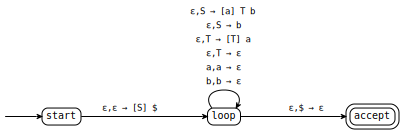

In [ ]:
to_graph(p1)

In [ ]:
run(p1, "a a a b", show_stack=10).shortest_path()

start,[a] a a b,ε
loop,[a] a a b,[S] $
loop,[a] a a b,[a] T b $
loop,[a] a b,[T] b $
loop,[a] a b,[T] a b $
loop,[a] a b,[T] a a b $
loop,[a] a b,[a] a b $
loop,[a] b,[a] b $
loop,b,[b] $
loop,ε,$
accept,ε,ε


The PDA in general looks like this:
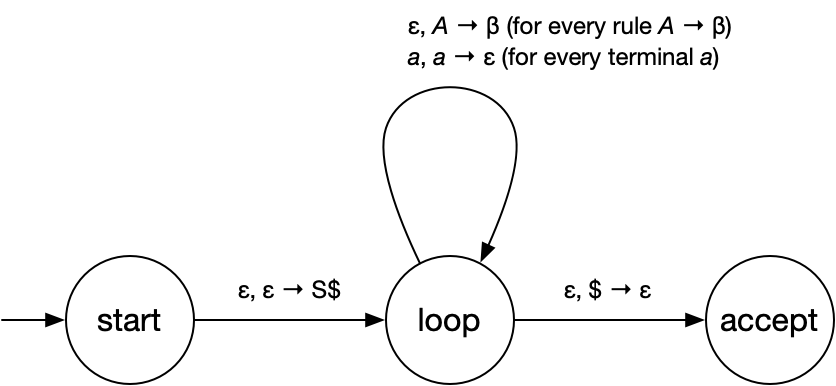

**Question.** Convert the following CFG to a PDA:

\begin{align*}
S &\rightarrow \mathtt{0} S \mathtt{0} \\
S &\rightarrow \mathtt{1} S \mathtt{1} \\
S &\rightarrow \varepsilon
\end{align*}